<a href="https://colab.research.google.com/github/sksuman97/TEDed-Talks-views-prediction/blob/main/Capstone_Project_3_Sumanta_Muduli_Ted_Talk_View_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Problem statement-- TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages. Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates. The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.

## Importing Liabraries

In [1]:
# Importing numpy and pandas
import pandas as pd
import numpy as np

# Importinng matplotlib and seaborn 
import matplotlib.pyplot as plt
import seaborn as sns

# I want to view it difference in days and views in a scaled manner

from sklearn.preprocessing import MinMaxScaler


# Importing train_test_split and grid search cv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


# Importing Various regressor algorithms from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
# Importing XGBRegessor from xgboost liabrary
from xgboost import XGBRegressor

# Importing evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


# Importing warnings liabrary to remove warnings
import warnings
warnings.filterwarnings('ignore')

## Loading data

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Capstone Projects/Ted Talk Views Prediction/Data/data_ted_talks.csv")

# Exploratory Data Analysis

Checking for duplicate rows in dataset

In [3]:
df.duplicated(['talk_id']).sum()

0

No duplicates found

Removing 'talk_id' column from df as it's of no use

In [4]:
del df['talk_id']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           4005 non-null   object 
 1   speaker_1       4005 non-null   object 
 2   all_speakers    4001 non-null   object 
 3   occupations     3483 non-null   object 
 4   about_speakers  3502 non-null   object 
 5   views           4005 non-null   int64  
 6   recorded_date   4004 non-null   object 
 7   published_date  4005 non-null   object 
 8   event           4005 non-null   object 
 9   native_lang     4005 non-null   object 
 10  available_lang  4005 non-null   object 
 11  comments        3350 non-null   float64
 12  duration        4005 non-null   int64  
 13  topics          4005 non-null   object 
 14  related_talks   4005 non-null   object 
 15  url             4005 non-null   object 
 16  description     4005 non-null   object 
 17  transcript      4005 non-null   o

Most of the columns are of object type

In [6]:
df.describe()

,views,comments,duration
count,4.005000e+03,3350.000000,4005.000000
mean,2.148006e+06,161.997015,724.011236
std,3.451226e+06,268.838922,361.775462
min,0.000000e+00,0.000000,60.000000
25%,8.820690e+05,38.000000,393.000000
50%,1.375508e+06,89.000000,738.000000
75%,2.133110e+06,188.000000,974.000000
max,6.505195e+07,6449.000000,3922.000000


## Cleaning Data
* Handling null values in columns

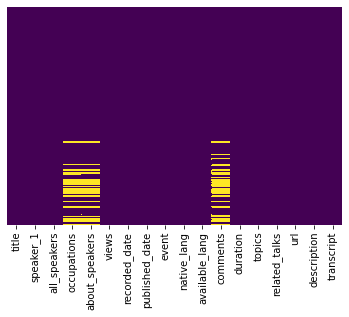

In [7]:
#checking the missing data in the dataset
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.rcParams['figure.figsize'] = (20, 5)

In [8]:
# Checking nan values in every column
def nan_check(data):
  '''creating a function that will show percentage of null values in each column'''
  total = data.isnull().sum().sort_values(ascending=False)
  percent_1 = data.isnull().sum()/data.isnull().count()*100
  percent_2 = (np.round(percent_1, 1)).sort_values(ascending=False)
  missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
  return missing_data

nan_check(df)

,Total,%
comments,655,16.4
occupations,522,13.0
about_speakers,503,12.6
all_speakers,4,0.1
recorded_date,1,0.0
transcript,0,0.0
published_date,0,0.0
speaker_1,0,0.0
views,0,0.0
event,0,0.0


In [9]:
df['views'].max()

65051954

# Imputing the Nan values :

##Numerical-- KNN nan value imputer

Datasets may have missing values, and this can cause problems for many machine learning algorithms.

As such, it is good practice to identify and replace missing values for each column in your input data prior to modeling your prediction task. This is called missing data imputation, or imputing for short.

A popular approach to missing data imputation is to use a model to predict the missing values. This requires a model to be created for each input variable that has missing values. Although any one among a range of different models can be used to predict the missing values, the k-nearest neighbor (KNN) algorithm has proven to be generally effective, often referred to as “nearest neighbor imputation.”

In [10]:
numerical_features= ['duration','comments']

In [11]:
#Import libraries
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer()

#fitting the model
imputer.fit(df[numerical_features])

# transform the dataset
df[numerical_features] = imputer.transform(df[numerical_features])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           4005 non-null   object 
 1   speaker_1       4005 non-null   object 
 2   all_speakers    4001 non-null   object 
 3   occupations     3483 non-null   object 
 4   about_speakers  3502 non-null   object 
 5   views           4005 non-null   int64  
 6   recorded_date   4004 non-null   object 
 7   published_date  4005 non-null   object 
 8   event           4005 non-null   object 
 9   native_lang     4005 non-null   object 
 10  available_lang  4005 non-null   object 
 11  comments        4005 non-null   float64
 12  duration        4005 non-null   float64
 13  topics          4005 non-null   object 
 14  related_talks   4005 non-null   object 
 15  url             4005 non-null   object 
 16  description     4005 non-null   object 
 17  transcript      4005 non-null   o

All the nan values for numerical features is removed.

## Categorical features-- nan values are labelled as 'Unkwown'

In [13]:
#categorical features 

categorical_features= ['title','speaker_1','all_speakers','event','native_lang','available_lang','topics','related_talks','url','description','transcript','occupations','about_speakers']

In [14]:
df[categorical_features]=df[categorical_features].fillna('Unknown')

The Recorded date is having null date but in string format. I would like to replace it with first value.

In [15]:
#First value

df['recorded_date'][0]

'2006-02-25'

In [16]:
df['recorded_date']=df['recorded_date'].fillna('2006-02-25')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           4005 non-null   object 
 1   speaker_1       4005 non-null   object 
 2   all_speakers    4005 non-null   object 
 3   occupations     4005 non-null   object 
 4   about_speakers  4005 non-null   object 
 5   views           4005 non-null   int64  
 6   recorded_date   4005 non-null   object 
 7   published_date  4005 non-null   object 
 8   event           4005 non-null   object 
 9   native_lang     4005 non-null   object 
 10  available_lang  4005 non-null   object 
 11  comments        4005 non-null   float64
 12  duration        4005 non-null   float64
 13  topics          4005 non-null   object 
 14  related_talks   4005 non-null   object 
 15  url             4005 non-null   object 
 16  description     4005 non-null   object 
 17  transcript      4005 non-null   o

## I have taken care of all null values.

#Extensive analysis on each of the features.

##I wanna take a look at what are the year,months and days that most of these ted talks have taken place.

First for the published dates: get the time stamps.

In [18]:
import time

In [19]:
import datetime

In [20]:
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

In [21]:
df['published_day'] = df['published_date'].apply(lambda x: x.weekday())
df['published_month'] = df['published_date'].apply(lambda x: x.month)
df['published_year'] = df['published_date'].apply(lambda x: x.year)

###For the recorded date now:

In [22]:
df['recorded_date'] = df['recorded_date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

In [23]:
df['recorded_day'] = df['recorded_date'].apply(lambda x: x.weekday())
df['recorded_month'] = df['recorded_date'].apply(lambda x: x.month)
df['recorded_year'] = df['recorded_date'].apply(lambda x: x.year)

## I also want to keep the number of days it takes between recording and publishing.

In [24]:
df['diff_record_publish']= df['published_date']- df['recorded_date']

In [25]:
df['diff_record_publish'] = pd.to_numeric(df['diff_record_publish'].dt.days, downcast='integer')

## Age of the video:

In [26]:
current_date= datetime.datetime(2021,5,18)

In [27]:
df['age_of_video']= current_date.year- df['published_year']

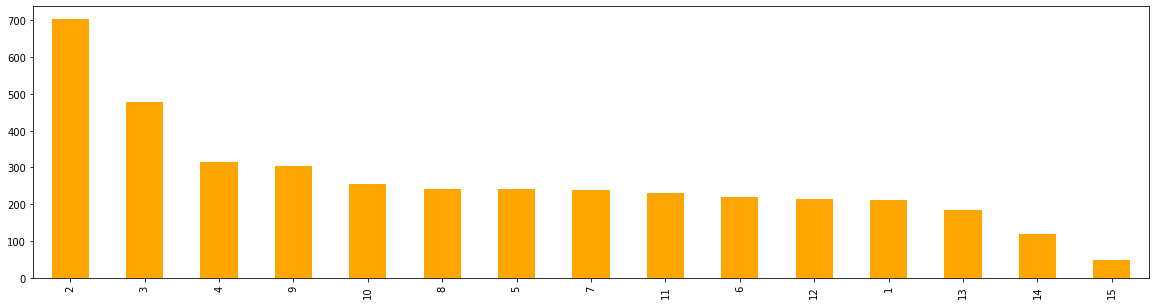

In [28]:
#Plotting the age of most videos

df['age_of_video'].value_counts().sort_values(ascending=False).plot(kind='bar', color= 'orange')



Determining the relationship of age of video with the views:

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   title                4005 non-null   object        
 1   speaker_1            4005 non-null   object        
 2   all_speakers         4005 non-null   object        
 3   occupations          4005 non-null   object        
 4   about_speakers       4005 non-null   object        
 5   views                4005 non-null   int64         
 6   recorded_date        4005 non-null   datetime64[ns]
 7   published_date       4005 non-null   datetime64[ns]
 8   event                4005 non-null   object        
 9   native_lang          4005 non-null   object        
 10  available_lang       4005 non-null   object        
 11  comments             4005 non-null   float64       
 12  duration             4005 non-null   float64       
 13  topics               4005 non-nul

Text(0.5, 1.0, 'Number of days between recording and publishing')

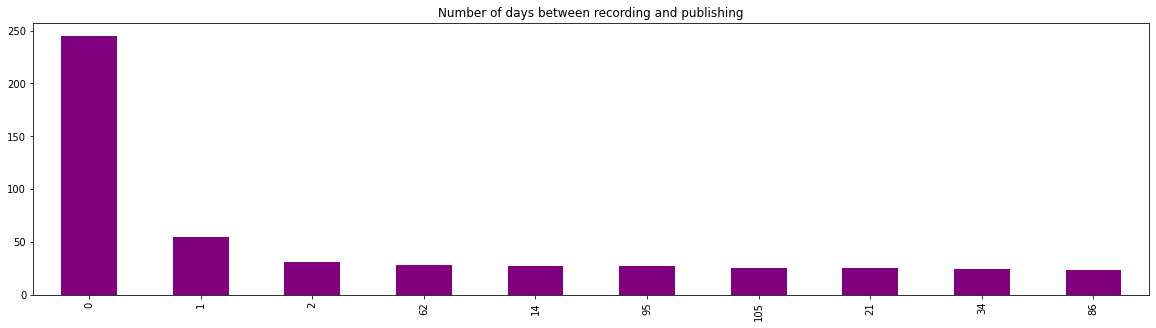

In [30]:
#plotting these to get a better idea

df['diff_record_publish'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',color='purple')

plt.title('Number of days between recording and publishing')

# Find the dependence of views on the difference in recorded and published days:

In [ ]:
df['diff_record_publish'] = MinMaxScaler().fit_transform(np.array(df['diff_record_publish']).reshape(-1,1))

In [31]:
df['views'] = MinMaxScaler().fit_transform(np.array(df['views']).reshape(-1,1))

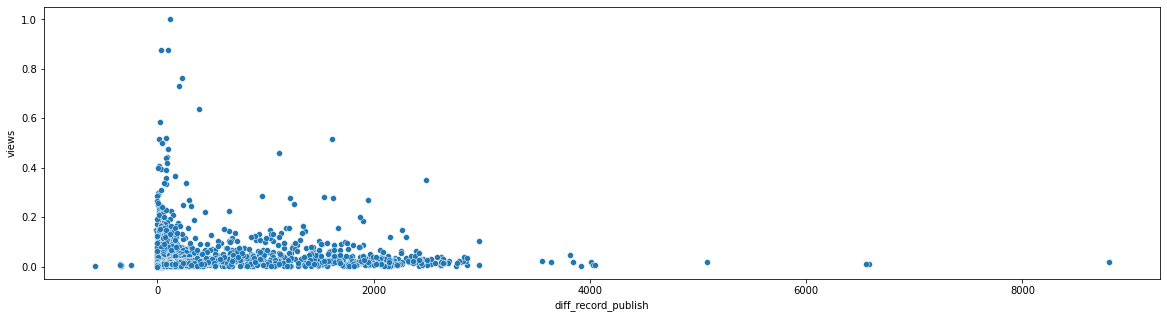

In [32]:
sns.scatterplot(x= df['diff_record_publish'], y=df['views'])

In [33]:
df.head(3)

,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,published_day,published_month,published_year,recorded_day,recorded_month,recorded_year,diff_record_publish,age_of_video
0,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,0.054163,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977.0,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",1,6,2006,5,2,2006,122,15
1,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",0.222925,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190.0,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",1,6,2006,2,2,2006,125,15
2,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,0.029528,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286.0,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",1,6,2006,4,2,2006,123,15


### Also Scaling the other numerical columns:

In [34]:
df['comments'] = MinMaxScaler().fit_transform(np.array(df['comments']).reshape(-1,1))

In [35]:
df['duration']= MinMaxScaler().fit_transform(np.array(df['duration']).reshape(-1,1))

In [36]:
df.head(3)

,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,published_day,published_month,published_year,recorded_day,recorded_month,recorded_year,diff_record_publish,age_of_video
0,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,0.054163,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",0.042177,0.237442,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",1,6,2006,5,2,2006,122,15
1,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",0.222925,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",0.097379,0.292595,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",1,6,2006,2,2,2006,125,15
2,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,0.029528,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",0.019228,0.317452,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",1,6,2006,4,2,2006,123,15


## The videos are usually published within a span of 3 months

## I want to determine the most popular days,months and year of publishing:

## Looking for the most popular days for the publishing views.

In [37]:
df['published_day']=df['published_day'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})

Text(0.5, 1.0, 'Published Days')

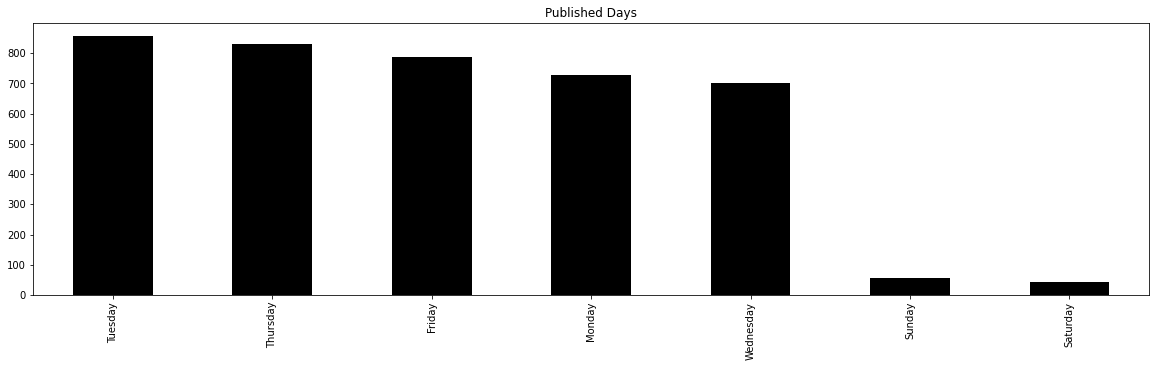

In [38]:
df['published_day'].value_counts().sort_values(ascending=False).plot(kind='bar', color='black')

plt.title('Published Days')

## Frequency encoding:

In [40]:
#Frequency encoiding

enc_nom_1 = (df.groupby('published_day').size()) / len(df)

df['published_day_encode'] = df['published_day'].apply(lambda x : enc_nom_1[x])

In [41]:
df.drop(columns='published_day',inplace= True)

## Most published months:


In [42]:
df['published_month']=df['published_month'].map({1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})


Text(0.5, 1.0, 'Published Months')

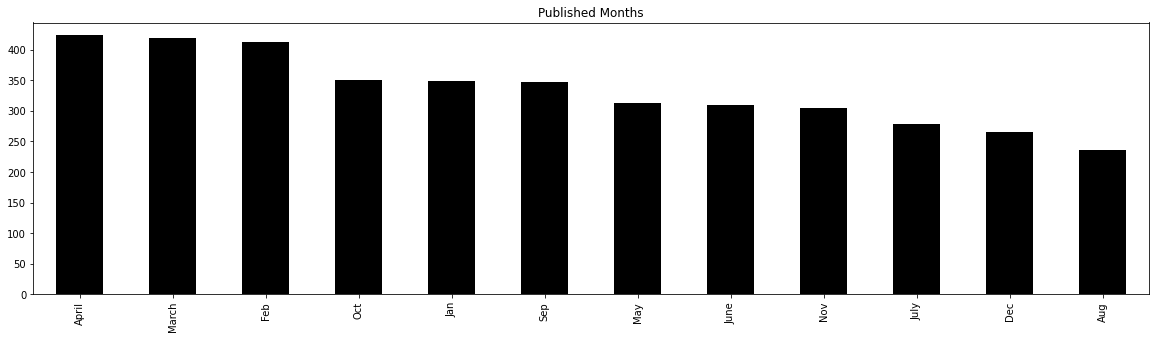

In [43]:
df['published_month'].value_counts().sort_values(ascending=False).plot(kind='bar', color='black')

plt.title('Published Months')

In [44]:
#Frequency encoding

enc_nom_1 = (df.groupby('published_month').size()) / len(df)

df['published_month_encode'] = df['published_month'].apply(lambda x : enc_nom_1[x])

In [45]:
df.drop(columns='published_month',inplace= True)

## Most published year:

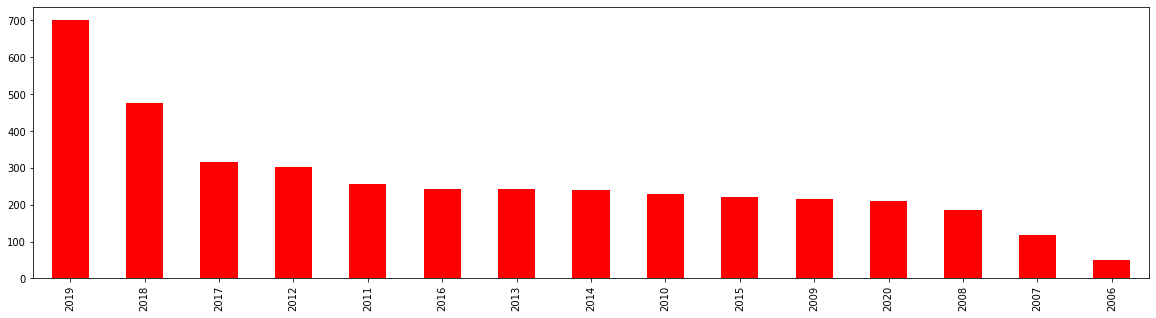

In [47]:
df['published_year'].value_counts().sort_values(ascending=False).plot(kind='bar', color='r')

# Most popular recorded day, month and year:

## Recorded days distribution:

In [48]:
df['recorded_day']=df['recorded_day'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})

In [115]:
df['recorded_day'].value_counts().sort_values(ascending=False).plot(kind='bar', color='black')

plt.title('Recorded Days')

KeyError: ignored

## Frequency encoding :

In [50]:
#Frequency encoiding

enc_nom_1 = (df.groupby('recorded_day').size()) / len(df)

df['recorded_day_encode'] = df['recorded_day'].apply(lambda x : enc_nom_1[x])

In [51]:
df.drop(columns= 'recorded_day',inplace= True)

## Monthly Recorded distribution:

In [52]:
df['recorded_month']=df['recorded_month'].map({1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

Text(0.5, 1.0, 'Recorded Months')

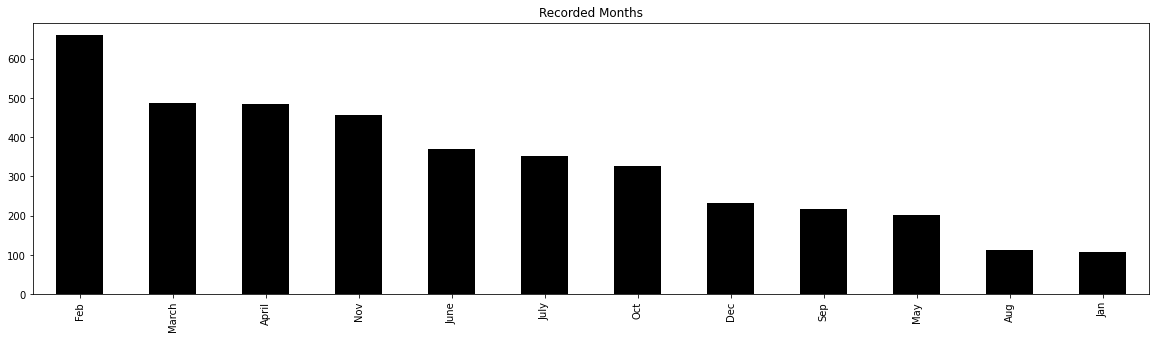

In [53]:
df['recorded_month'].value_counts().sort_values(ascending=False).plot(kind='bar', color='black')

plt.title('Recorded Months')

## Frequency encoding:


In [54]:
#Frequency encoiding

enc_nom_1 = (df.groupby('recorded_month').size()) / len(df)

df['recorded_month_encode'] = df['recorded_month'].apply(lambda x : enc_nom_1[x])

In [55]:
df.drop(columns= 'recorded_month',inplace= True)

## Most recorded year:

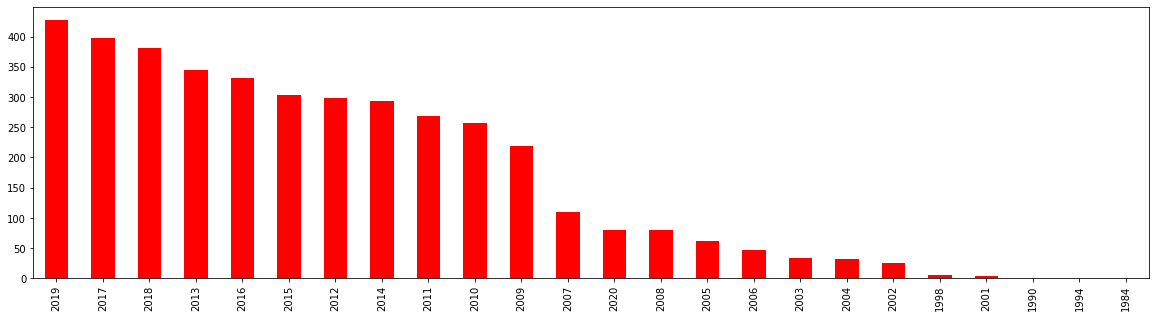

In [56]:
df['recorded_year'].value_counts().sort_values(ascending=False).plot(kind='bar', color='r')

# We can drop the following columns:

1.  URL- we aren't doing any SEO so doesn't seem important

2. published and recorded date- we have already taken care of these non numerical columns.

In [57]:
df.drop(columns=['url','recorded_date','published_date'],inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   4005 non-null   object 
 1   speaker_1               4005 non-null   object 
 2   all_speakers            4005 non-null   object 
 3   occupations             4005 non-null   object 
 4   about_speakers          4005 non-null   object 
 5   views                   4005 non-null   float64
 6   event                   4005 non-null   object 
 7   native_lang             4005 non-null   object 
 8   available_lang          4005 non-null   object 
 9   comments                4005 non-null   float64
 10  duration                4005 non-null   float64
 11  topics                  4005 non-null   object 
 12  related_talks           4005 non-null   object 
 13  description             4005 non-null   object 
 14  transcript              4005 non-null   

# Number of languages: 

First convert the string to list:

In [59]:
#Function to use eval function to convert string to list.
def convert_string_to_original_dtype(x):
  return eval(x)

In [60]:
df['available_lang']= df['available_lang'].apply(convert_string_to_original_dtype)

Create another feature that has the count of these languages:

In [61]:
#Function to calculate the count of languages

def length(x):
  return len(x)

In [62]:
df['count_available_lang']= df['available_lang'].apply(length)

Let us see the distribution now:

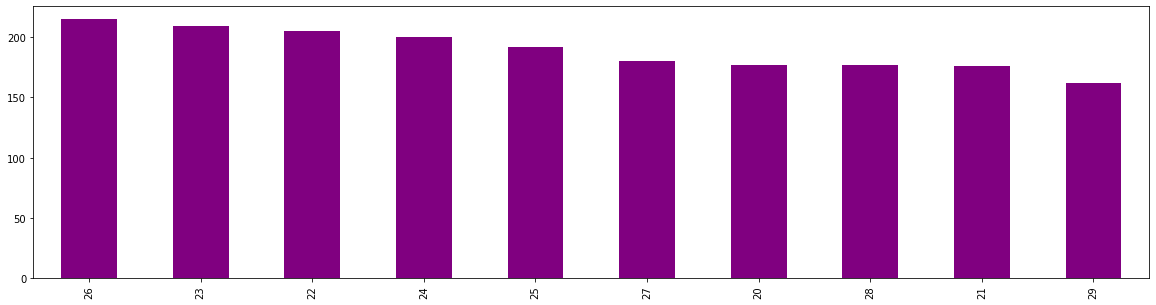

In [63]:
#Distribution of the top 10 counts of languages

df['count_available_lang'].value_counts().sort_values(ascending= False).head(10).plot(kind= 'bar',color= 'purple')


Most ted talks are available in 20-30 languages.

Now that I have the count of languages in a numerical format, I can drop the available languages column.

In [64]:
#dropping the available languages

df.drop(columns='available_lang',inplace= True)

## Native Languages:

In [65]:
#Looking at the unique values first

df['native_lang'].unique()

array(['en', 'fr', 'de', 'pt', 'ko', 'zh-cn', 'ar', 'pt-br', 'es', 'ja',
       'it', 'hi'], dtype=object)

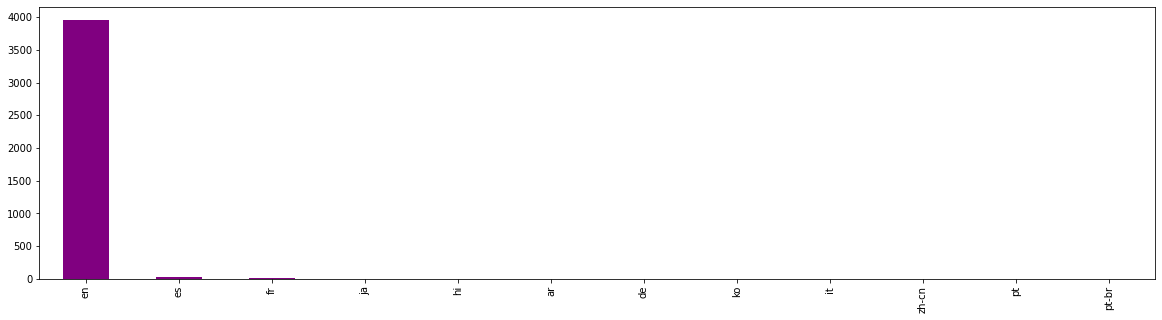

In [66]:
#The distribution:

df['native_lang'].value_counts().plot(kind='bar',color='purple')

Around 3950 are available in English and around only 50 in other languages. This will not result in any difference in the views because of the 5% difference and mostly is a homogenous column.

I will therefore drop this to not further increase the complexity.

In [67]:
df.drop(columns='native_lang',inplace= True)

## Event:

In [68]:
df['event'][0]

'TED2006'

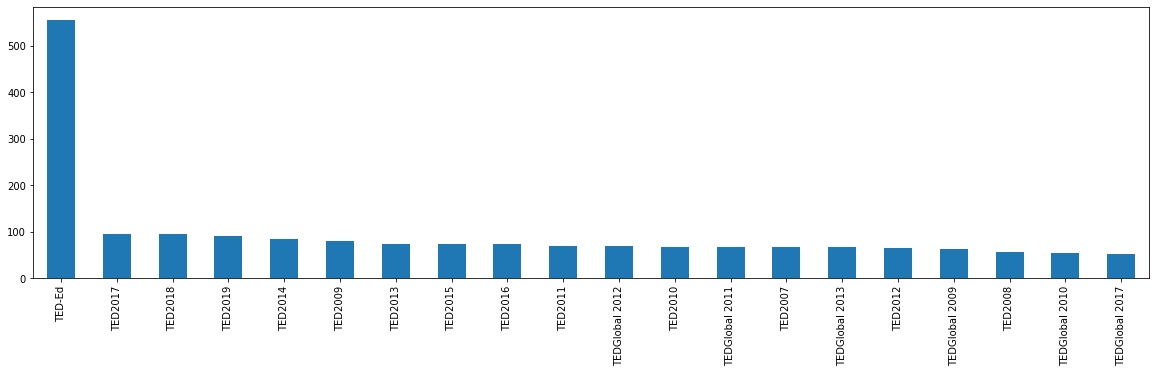

In [69]:
df['event'].value_counts().sort_values(ascending= False).head(20).plot(kind= 'bar')

The Ted-Ed  being the one with the highest medium gives us a idea that 

---

knowledge sharing and academics is a very popular kind of medium.

## Frequency Encoding-

In [72]:
enc_nom_1 = (df.groupby('event').size()) / len(df)

df['event_encode'] = df['event'].apply(lambda x : enc_nom_1[x])

In [73]:
df.drop(columns= 'event',inplace =True)

## Number of Speakers:

 This column will help retain the speakers :

In [74]:
df['all_speakers'][0]

"{0: 'Al Gore'}"

Function for converting:

In [75]:
#This function converts string to dict:
def convert_string_to_dict(x):
  if x== 'Unknown':
    pass
  else:
    return eval(x)

In [76]:
df['all_speakers']=df['all_speakers'].apply(convert_string_to_dict)

In [77]:
df['all_speakers'][0]

{0: 'Al Gore'}

Next I want to get speakers in a series format and not in a dictionary format. And the count of speakers in each talk.

In [78]:
len(df['all_speakers'][0])

1

In [79]:
#function to obtain the count of speakers

def get_count_speakers(x):
  try:
    return len(x)
  except TypeError:
    return 0


In [80]:
df['count_of_speakers']= df['all_speakers'].apply(get_count_speakers)

Text(0.5, 1.0, 'Count of Speakers')

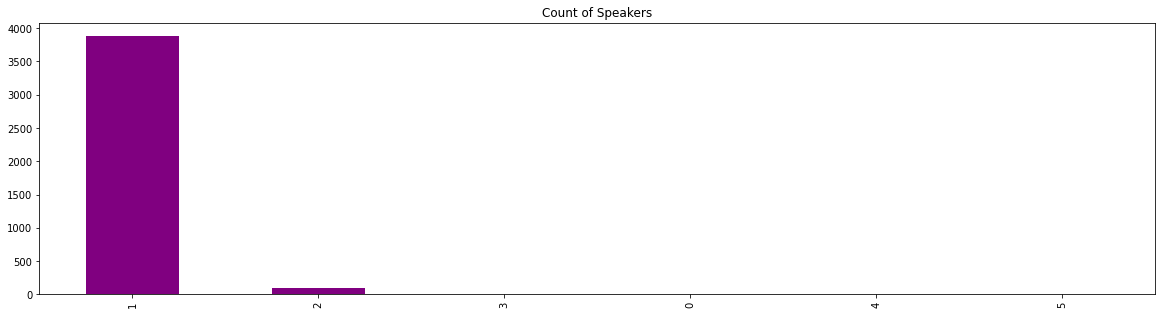

In [81]:
df['count_of_speakers'].value_counts().plot(kind='bar',color='purple')

plt.title('Count of Speakers')

Except a few, most have 1 speaker in the talks.

In [82]:
#function to get a separate column for the speakers only

def get_speakers(x):
  speakers=[]
  try:
    for key,value in x.items():
      speakers.append(value)
  except AttributeError:
    speakers.append('Unknown')
  return speakers


In [83]:
df['Speakers']= df['all_speakers'].apply(get_speakers)

Let us see who are the speakers :

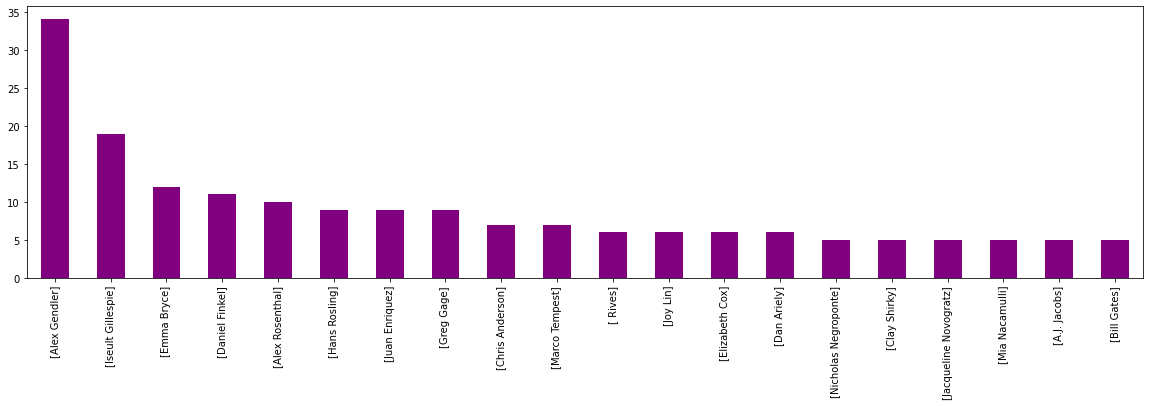

In [84]:
df['Speakers'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar',color='purple')

Comparing views with number of speakers:

In [86]:
df['count_of_speakers'] = MinMaxScaler().fit_transform(np.array(df['count_of_speakers']).reshape(-1,1))

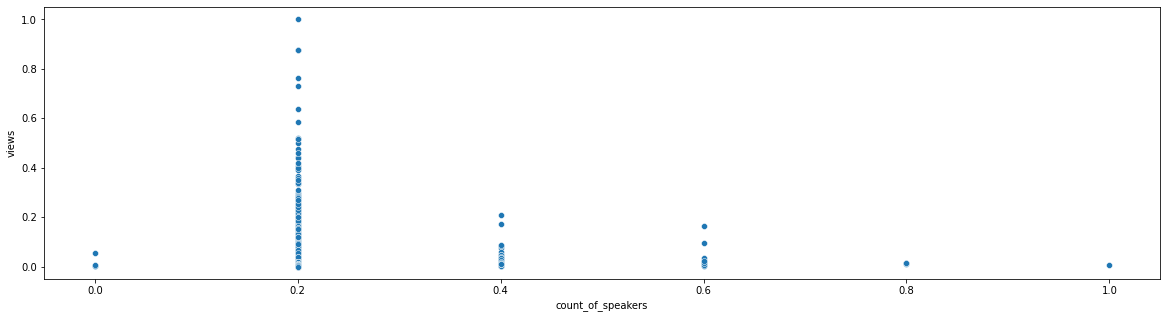

In [87]:
sns.scatterplot(x= df['count_of_speakers'], y=df['views'])

Since the number of speakers is not at all related to views.

We can infer from here that, one speaker is enough for views if he popular enough and not needed for two speakers

As Speakers_1 is very similar to all_Speakers

In [88]:
df.drop(columns=['all_speakers','count_of_speakers','Speakers'],inplace= True)

## Speaker 1:

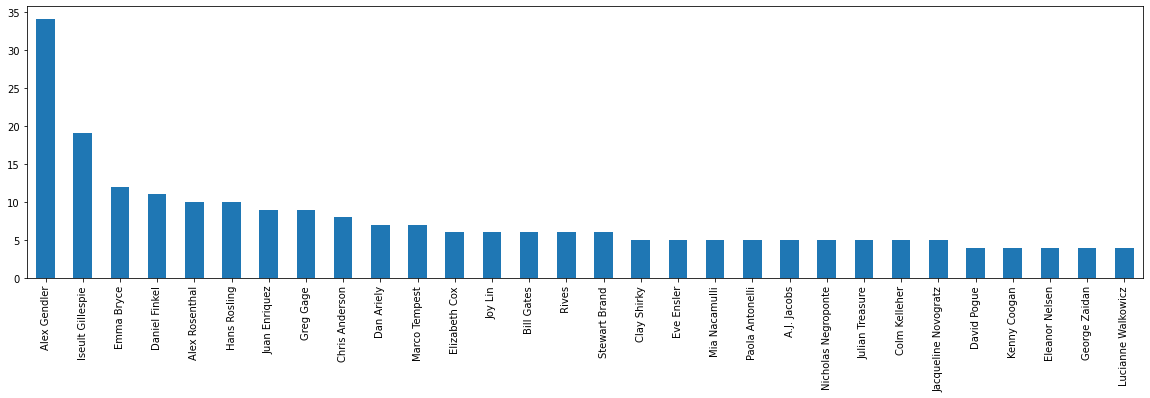

In [89]:
df['speaker_1'].value_counts().sort_values(ascending= False).head(30).plot(kind='bar')

## Encoding by Frequency Encoding:

In [90]:
enc_nom_1 = (df.groupby('speaker_1').size()) / len(df)


In [91]:
df['speaker_1_encode'] = df['speaker_1'].apply(lambda x : enc_nom_1[x])

## Dropping the speaker 1 feature then:

In [92]:
df.drop(columns='speaker_1',inplace= True)

## Occupation:

In [94]:
df['occupations'][0]

{0: ['climate advocate']}

In [93]:
df['occupations']=df['occupations'].apply(convert_string_to_dict)

In [95]:
#Function to convert list to string
def list_to_string(x):
  for item in x:
    return item

In [96]:
#Function to obtain occupation 

def get_occupation(x):
  try:
    for key,value in x.items():
      return value
  except AttributeError:
    return 'Unknown'



In [97]:
df['occupation']= df['occupations'].apply(get_occupation)

In [ ]:
df['occupation'][0]

In [98]:
df['occupation']= df['occupation'].apply(list_to_string)

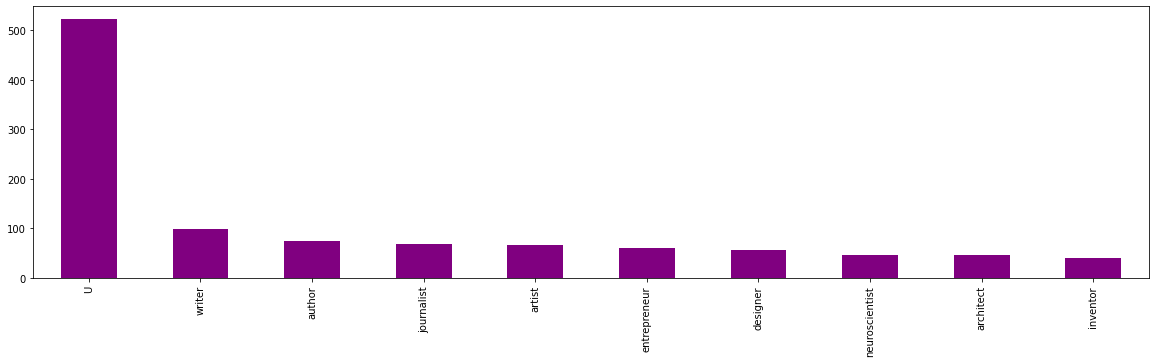

In [99]:
#Plot the occupations plot

df['occupation'].value_counts().head(10).plot(kind='bar',color= 'purple')

A lot of these values are given as 'U'. Let me understand these values first.

In [100]:
df[df['occupation']=='U'].head(3)

,title,occupations,about_speakers,views,comments,duration,topics,related_talks,description,transcript,published_year,recorded_year,diff_record_publish,age_of_video,published_day_encode,published_month_encode,recorded_day_encode,recorded_month_encode,count_available_lang,event_encode,speaker_1_encode,occupation
1142,I am a pirate,None,"{0: 'Rick Falkvinge, didn’t plan on becoming a...",0.003390,0.019848,0.268514,"['Internet', 'TEDx', 'global issues', 'politic...","{1329: 'Why SOPA is a bad idea', 871: 'Re-exam...","The Pirate Party fights for transparency, anon...",Thank y'all! This is going to be a motivationa...,2012,2013,-578,9,0.013733,0.105618,0.212484,0.081648,16,0.001498,0.00025,U
1170,Tracking our online trackers,None,{0: 'Gary Kovacs is a technologist and the for...,0.034221,0.040316,0.087778,"['Internet', 'advertising', 'business', 'priva...","{1370: 'All your devices can be hacked', 788: ...","As you surf the Web, information is being coll...","I don't know why, but I'm continually amazed t...",2012,2012,64,9,0.207740,0.077903,0.181273,0.164544,32,0.016230,0.00025,U
1241,Image recognition that triggers augmented reality,None,"{0: 'Matt Mills comes from Aurasma, a startup ...",0.041165,0.021709,0.109788,"['demo', 'design', 'interface design', 'scienc...","{481: 'Meet the SixthSense interaction', 1411:...",Matt Mills and Tamara Roukaerts demonstrate Au...,So wouldn't it be amazing if our phones could ...,2012,2012,23,9,0.207740,0.069413,0.175031,0.092385,26,0.017478,0.00025,U


Most of the U values are given for None type occupations. I will be changing them to not available.

In [101]:
df['occupation']=df['occupation'].replace(['U'],'Not available')

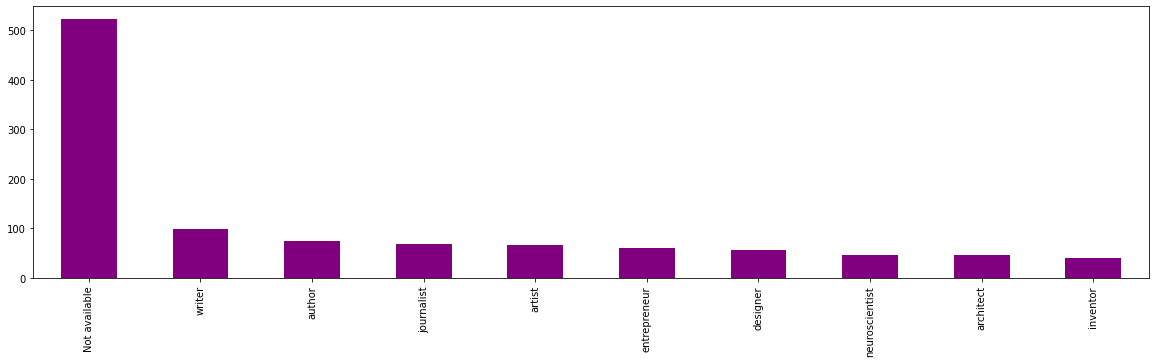

In [102]:
df['occupation'].value_counts().head(10).plot(kind='bar',color= 'purple')

In [103]:
df.drop(columns='occupations',inplace= True)

## Frequency encoding

In [106]:
enc_nom_1 = (df.groupby('occupation').size()) / len(df)

df['occupation_encode'] = df['occupation'].apply(lambda x : enc_nom_1[x])

In [107]:
df.drop(columns='occupation',inplace=True)

## Correlation between variables- 

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   4005 non-null   object 
 1   about_speakers          4005 non-null   object 
 2   views                   4005 non-null   float64
 3   comments                4005 non-null   float64
 4   duration                4005 non-null   float64
 5   topics                  4005 non-null   object 
 6   related_talks           4005 non-null   object 
 7   description             4005 non-null   object 
 8   transcript              4005 non-null   object 
 9   published_year          4005 non-null   int64  
 10  recorded_year           4005 non-null   int64  
 11  diff_record_publish     4005 non-null   int16  
 12  age_of_video            4005 non-null   int64  
 13  published_day_encode    4005 non-null   float64
 14  published_month_encode  4005 non-null   

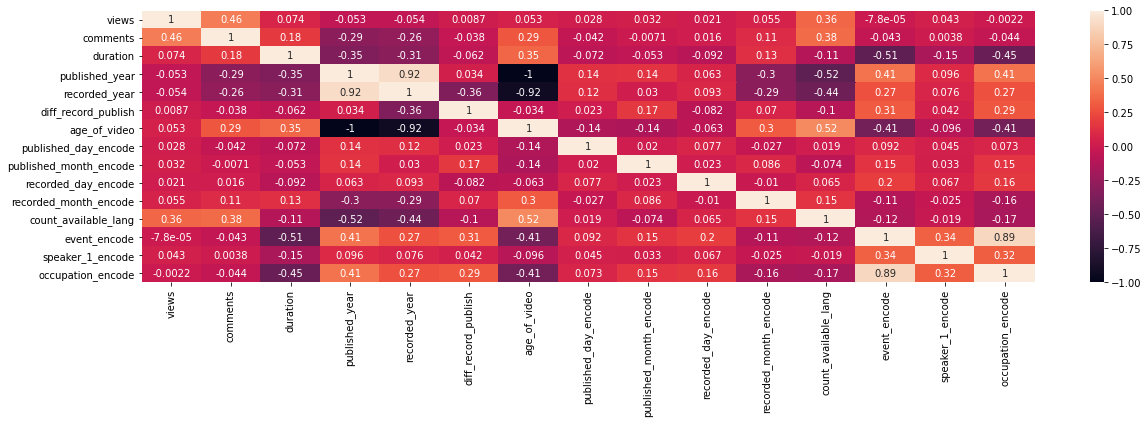

In [109]:
sns.heatmap(df.corr(),annot= True)

## We can remove occupation and event:

1. They are highly correlated to each other

2. Not much relationship with the views.

In [110]:
df.drop(columns=['event_encode','occupation_encode'],inplace= True)

## Remove published and recorded year due to following reasons:

1. Very highly correlated to one another and closely to some other variables.

2. Not much relationship with views.

In [111]:
df.drop(columns=['published_year','recorded_year'],inplace= True)

# Let us visualize the most spoken about topics in the Ted talks :

Dataset have very little nan values, we can drop them directly

In [112]:
# Dropping nan values from columns
df.dropna(inplace=True)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4005 entries, 0 to 4004
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   4005 non-null   object 
 1   about_speakers          4005 non-null   object 
 2   views                   4005 non-null   float64
 3   comments                4005 non-null   float64
 4   duration                4005 non-null   float64
 5   topics                  4005 non-null   object 
 6   related_talks           4005 non-null   object 
 7   description             4005 non-null   object 
 8   transcript              4005 non-null   object 
 9   diff_record_publish     4005 non-null   int16  
 10  age_of_video            4005 non-null   int64  
 11  published_day_encode    4005 non-null   float64
 12  published_month_encode  4005 non-null   float64
 13  recorded_day_encode     4005 non-null   float64
 14  recorded_month_encode   4005 non-null   

In [114]:
df.describe()

,views,comments,duration,diff_record_publish,age_of_video,published_day_encode,published_month_encode,recorded_day_encode,recorded_month_encode,count_available_lang,speaker_1_encode
count,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000
mean,0.033020,0.024291,0.171935,308.413983,6.403246,0.191815,0.085905,0.160855,0.102669,25.304120,0.000496
std,0.053053,0.038539,0.093676,587.146077,3.991930,0.031772,0.014596,0.042172,0.038524,9.038567,0.000880
min,0.000000,0.000000,0.000000,-578.000000,1.000000,0.010487,0.058926,0.047940,0.026717,1.000000,0.000250
25%,0.013559,0.006823,0.086225,42.000000,3.000000,0.181523,0.076155,0.116604,0.081648,20.000000,0.000250
50%,0.021145,0.014886,0.175557,104.000000,6.000000,0.197004,0.086642,0.175031,0.113858,25.000000,0.000250
75%,0.032791,0.028376,0.236665,229.000000,10.000000,0.207740,0.102871,0.181273,0.121348,31.000000,0.000499
max,1.000000,1.000000,1.000000,8804.000000,15.000000,0.213983,0.105618,0.212484,0.164544,73.000000,0.008489


## Numerical Features

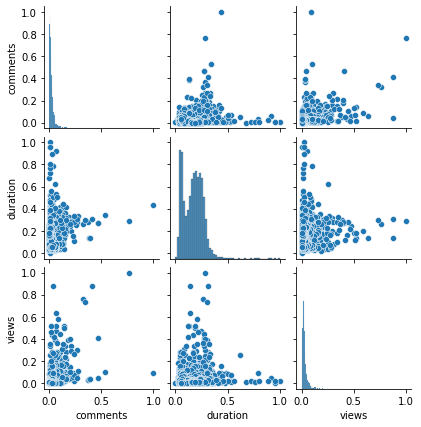

In [116]:
sns.pairplot(df[['comments', 'duration','views']],  size=2)
plt.show()

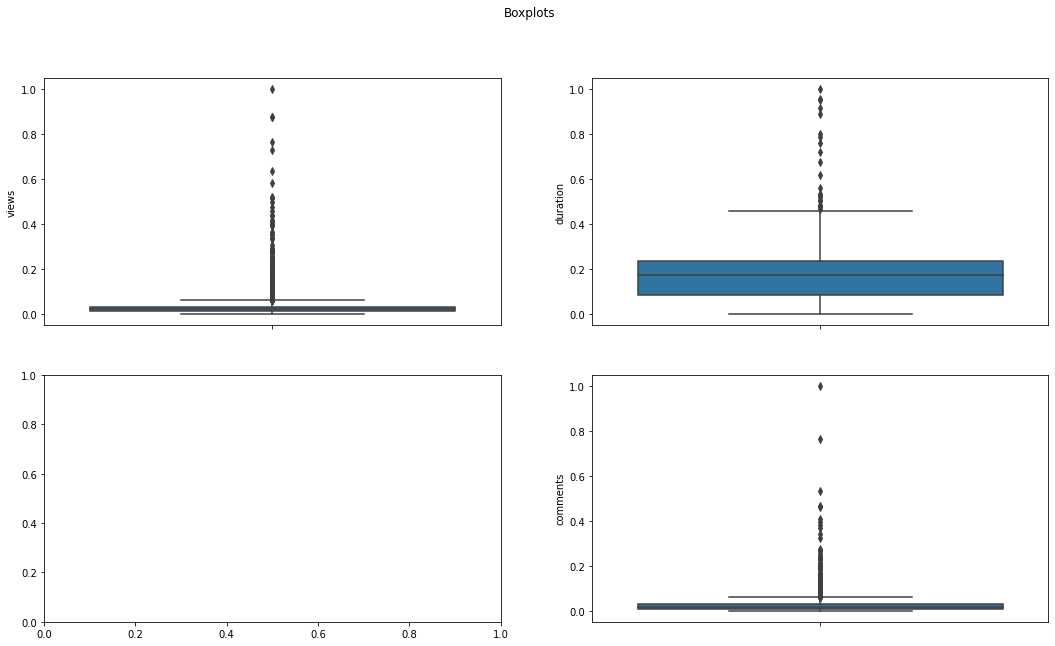

In [117]:
fig, axes = plt.subplots(2,2, figsize=(18, 10))

fig.suptitle('Boxplots')

sns.boxplot(ax=axes[0, 0], data=df, y='views')
sns.boxplot(ax=axes[0, 1], data=df,  y='duration')
sns.boxplot(ax=axes[1,1], data=df, y='comments')

Many outliers are there

## Distibution of variables

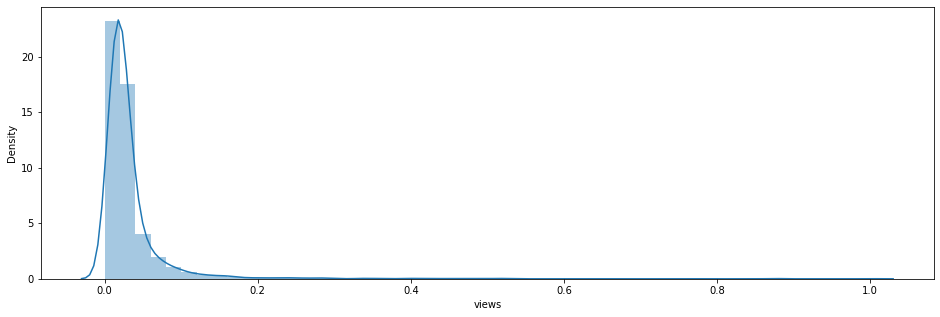

In [118]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.distplot(df['views'], ax=ax)

Right Skewed 

In [127]:
df.head()

,title,about_speakers,views,comments,duration,topics,related_talks,description,transcript,diff_record_publish,age_of_video,published_day_encode,published_month_encode,recorded_day_encode,recorded_month_encode,count_available_lang,speaker_1_encode
0,Averting the climate crisis,{0: 'Nobel Laureate Al Gore focused the world’...,0,0.042177,0.237442,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",122,15,0.213983,0.077403,0.116604,0.164544,43,0.000999
1,The best stats you've ever seen,"{0: 'In Hans Rosling’s hands, data sings. Glob...",0,0.097379,0.292595,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",125,15,0.213983,0.077403,0.181273,0.164544,49,0.002497
2,Simplicity sells,{0: 'David Pogue is the personal technology co...,0,0.019228,0.317452,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",123,15,0.213983,0.077403,0.113858,0.164544,26,0.000999
3,Greening the ghetto,{0: 'Majora Carter redefined the field of envi...,0,0.033959,0.273433,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,121,15,0.213983,0.077403,0.047940,0.164544,35,0.000499
4,Do schools kill creativity?,"{0: ""Creativity expert Sir Ken Robinson challe...",1,0.764615,0.285862,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,122,15,0.213983,0.077403,0.116604,0.164544,62,0.000749


In [126]:
df['views']

0       0
1       0
2       0
3       0
4       1
       ..
4000    0
4001    0
4002    0
4003    0
4004    0
Name: views, Length: 4005, dtype: int64

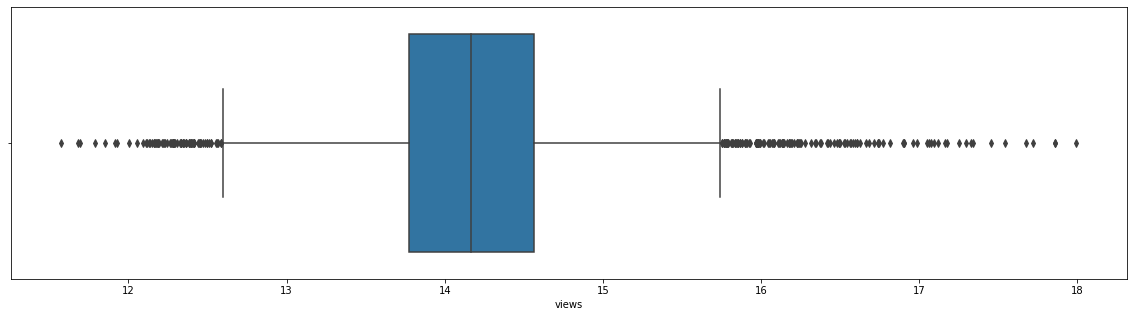

In [ ]:
sns.boxplot(np.log(df['views']))

Target variable is now in perfect normal shape

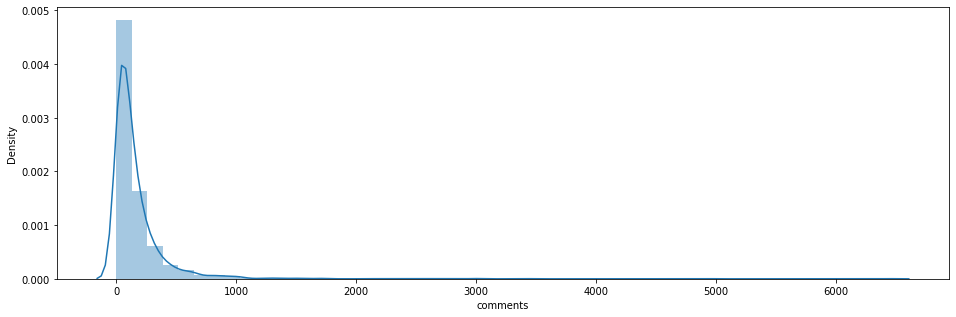

In [ ]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.distplot(df['comments'],ax=ax)

Right skewed

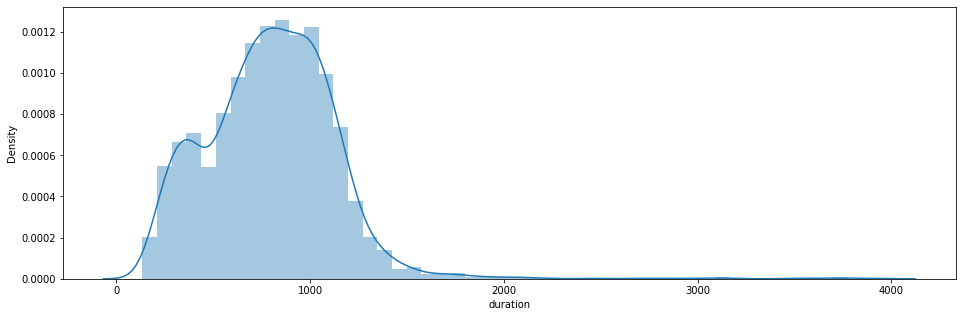

In [ ]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.distplot(df['duration'],ax=ax)

## Counting number of outliers in a column

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

about_speakers      0
all_speakers        0
available_lang      0
comments          261
description         0
duration           35
event               0
native_lang         0
occupations         0
published_date      0
recorded_date       0
related_talks       0
speaker_1           0
title               0
topics              0
transcript          0
url                 0
views             340
dtype: int64

1. Number of languages
2. Time taken to publish the video.
3. Number of speakers
4. Number of Occupations
5. How many talks that speaker has given prior to this
6. cluster label
7. From topic column we can find out top 10 topics and can use one hat encoding 
8. We can use point number 8 for speaker column as well.
9. Planning to cluster transcript+related talks, then we could built different models.


In [ ]:
df.head()

## challenge-1
###How to induce impact of speaker columns on prediction

In [ ]:
df['speaker_1'].value_counts()

Alex Gendler        34
Iseult Gillespie    19
Emma Bryce          12
Daniel Finkel       11
Alex Rosenthal      10
                    ..
Trevor Timm          1
Sophia Wallace       1
Kevin Slavin         1
John Koenig          1
 Teitur              1
Name: speaker_1, Length: 3274, dtype: int64

In [ ]:
df['occupations'][4]

"{0: ['author', 'educator']}"

In [ ]:
df['about_speakers'][4]

'{0: "Creativity expert Sir Ken Robinson challenges the way we\'re educating our children. He champions a radical rethink of our school systems, to cultivate creativity and acknowledge multiple types of intelligence. "}'

In [ ]:
df['all_speakers'][10]

"{0: 'Larry Brilliant'}"

In [ ]:
df['topics'][4]

"['children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching']"

In [ ]:
df['related_talks'][4]

'{865: \'Bring on the learning revolution!\', 1738: "How to escape education\'s death valley", 2276: \'How to fix a broken school? Lead fearlessly, love hard\', 2182: \'How to run a company with (almost) no rules\', 2341: "Why some of us don\'t have one true calling", 9048: \'The search for "aha!" moments\'}'

In [ ]:
df['description'][4]

'Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.'

In [ ]:
len(df['transcript'][4])

17558